<h1>Prediccion de precios de vuelos con regresion</h1>

In [1]:

import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("Clean_Dataset.csv")

In [3]:
df 
#"""dataset de kaggle https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data """

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

Tenemos 6 aerolineas por lo que podemos aplicar One Hot Coding ya que los modelos no aceptan variables categoricas, observamos que la mayoria es categorica por 

In [6]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [7]:
df["class"].value_counts()


class
Economy     206666
Business     93487
Name: count, dtype: int64

In [8]:
df.describe() # Solo aplica con valores numericos

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<h1>Preprocesamiento de los datos </h1>

In [9]:
df = df.drop(columns=["Unnamed: 0","flight"], axis=1) # Elimina columnas inecesarias las eliminamos por que no aportan a la prediccion

In [10]:
df['stops'] = pd.factorize(df['stops'])[0] 
df['class'] = df['class'].map({'Business': 1, 'Economy': 0})

In [11]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [12]:
df = df = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'],
                         dtype=int, prefix=['airline', 'source', 'departure','arrival', 'dest'])

In [13]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dest_Bangalore,dest_Chennai,dest_Delhi,dest_Hyderabad,dest_Kolkata,dest_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


Tenemos valores binarios o numericos 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   stops                    300153 non-null  int64  
 1   class                    300153 non-null  int64  
 2   duration                 300153 non-null  float64
 3   days_left                300153 non-null  int64  
 4   price                    300153 non-null  int64  
 5   airline_AirAsia          300153 non-null  int32  
 6   airline_Air_India        300153 non-null  int32  
 7   airline_GO_FIRST         300153 non-null  int32  
 8   airline_Indigo           300153 non-null  int32  
 9   airline_SpiceJet         300153 non-null  int32  
 10  airline_Vistara          300153 non-null  int32  
 11  source_Bangalore         300153 non-null  int32  
 12  source_Chennai           300153 non-null  int32  
 13  source_Delhi             300153 non-null  int32  
 14  sour

<h1>Entrenamiento del modelo </h1>

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble  import RandomForestRegressor

In [ ]:
X, y = df.drop('price', axis= 1), df.price 
# Separamos la variable dependiente de la independiente
# X = df.drop(columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
#Evaluamos 

RandomForestRegressor()

In [18]:
reg.score(X_test,y_test)

0.984893587347003

In [19]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


In [20]:
y_pred = reg.predict(X_test)

In [21]:
print('R2: ', r2_score(y_test, y_pred))

R2:  0.984893587347003


score y r2 es el mismo valores 0.9849, ambos calculan el coeficiente de determinacion r2,
el cual mide que tan bien el modelo de regresion explica la variabilidad de los datos. 

In [22]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  1078.4854777637436
MSE:  7787087.939836473


In [66]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances  = sorted(importances.items(), key=lambda x:x[1], reverse=True)
sorted_importances

[('class', 0.8798401107233798),
 ('duration', 0.05771360497479355),
 ('days_left', 0.01848914936308349),
 ('airline_Air_India', 0.005319687420592633),
 ('airline_Vistara', 0.00462997935533777),
 ('source_Delhi', 0.003696474379729204),
 ('dest_Delhi', 0.0033812450410588193),
 ('source_Mumbai', 0.0022697934236388015),
 ('stops', 0.0018994764932322792),
 ('dest_Mumbai', 0.0018727294060063833),
 ('dest_Kolkata', 0.001814128639146),
 ('source_Kolkata', 0.0017621246868509389),
 ('arrival_Evening', 0.0015452674291744433),
 ('dest_Hyderabad', 0.0014907526347663225),
 ('dest_Bangalore', 0.001361049743664865),
 ('source_Hyderabad', 0.0012868909339537142),
 ('arrival_Night', 0.0011333289579434772),
 ('source_Bangalore', 0.0010951999458597098),
 ('departure_Evening', 0.0010685785947137968),
 ('arrival_Afternoon', 0.0009865645502057097),
 ('source_Chennai', 0.0008824926461508809),
 ('departure_Morning', 0.0008809641474092556),
 ('dest_Chennai', 0.0008565487227669181),
 ('departure_Afternoon', 0.000

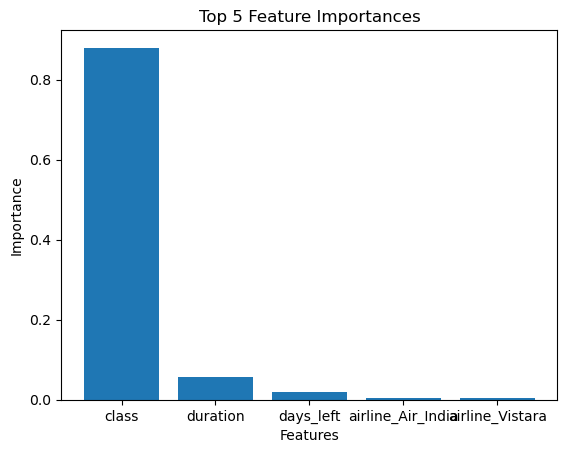

In [ ]:
import matplotlib.pyplot as plt
#importancia de cada caracteristica
#diccionario,zip une los nombres de las columnas con sus importancias
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# debido a que es un diccionario, x0 equivale a el nombre y x1 al valor
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()

In [ ]:
# Ajustar hiperparametros, es necesario para mejprar el modelo, es opcional por lo que no se ejecuti debdio al tiempo que demora
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt']
}
reg = RandomForestRegressor()
random_search = RandomizedSearchCV(reg, param_distributions=params, n_iter=100, cv=3,  scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_model.score(X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
